In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

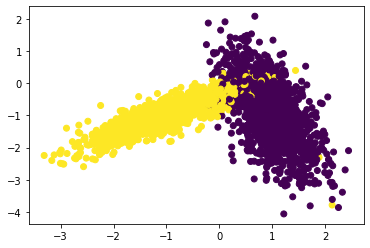

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [11]:
#Divide the data for each fold
def train_test_fold_split(x_train,y_tain,folds):
    fold_index_range = int(len(x_train)/folds)
    rem = int(len(x_train)%folds)
    li_x = list()
    li_y = list()
    indices_range = 0
    for i in range(folds):
        li_x.append(x_train[indices_range:indices_range+fold_index_range])
        li_y.append(y_train[indices_range:indices_range+fold_index_range])
        indices_range += fold_index_range 
    
    if(rem > 0):
        li_x.append(x_train[fold_index_range*folds:])  
        li_y.append(x_train[fold_index_range*folds:])    
    return li_x,li_y

#Split Train and Test data per fold
def get_train_data_indices(li_set,old,flag):
    #i = True
    while flag:
      new = random.sample(range(0,len(li_set)),len(li_set) -1 )
      new.sort()

      if(new in old):         
          continue
      else:
          break    
    old.append(new)   
    return new

#Custom RandomSearchCV Implementation 
def RandomSearchCV(x_train,y_train,classifier,params,folds):
    trainscores = []
    testscores = []
    li_x_set,li_y_set = train_test_fold_split(x_train,y_train,folds)
   
    
    for k in tqdm(params['n_neighbors']):
        
        trainscores_folds = []
        testscores_folds  = []
        old = list()
        for j in range(0, folds):
            indices = get_train_data_indices(li_x_set,old,True)
            print('\n Fold '+ str(j) + ' train indices: ',indices)
            x_train_arr = np.concatenate([li_x_set[h] for h in indices])
            y_train_arr =  np.concatenate([li_y_set[h] for h in indices])
            test_indices = list(set(list(range(0, len(li_x_set)))).symmetric_difference(set(indices)))
            x_test_arr = li_x_set[test_indices[0]]
            y_test_arr = li_y_set[test_indices[0]]
            classifier.n_neighbors = k
            classifier.fit(x_train_arr,y_train_arr)

            y_predicted = classifier.predict(x_test_arr)
            testscores_folds.append(accuracy_score(y_test_arr, y_predicted))

            y_predicted = classifier.predict(x_train_arr)
            trainscores_folds.append(accuracy_score(y_train_arr, y_predicted))
        print('train indices per k :',old)    
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores
                 

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

list_params = random.sample(range(1,25), 10)
list_params.sort()
print(list_params)
params = {'n_neighbors':list_params}
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)

[2, 3, 4, 6, 7, 13, 14, 20, 22, 23]


  0%|          | 0/10 [00:00<?, ?it/s]


 Fold 0 train indices:  [1, 2]

 Fold 1 train indices:  [0, 1]

 Fold 2 train indices:  [0, 2]


 10%|█         | 1/10 [00:01<00:13,  1.49s/it]

train indices per k : [[1, 2], [0, 1], [0, 2]]

 Fold 0 train indices:  [0, 2]

 Fold 1 train indices:  [0, 1]

 Fold 2 train indices:  [1, 2]


 20%|██        | 2/10 [00:02<00:08,  1.09s/it]

train indices per k : [[0, 2], [0, 1], [1, 2]]

 Fold 0 train indices:  [0, 1]

 Fold 1 train indices:  [1, 2]

 Fold 2 train indices:  [0, 2]


 30%|███       | 3/10 [00:03<00:06,  1.05it/s]

train indices per k : [[0, 1], [1, 2], [0, 2]]

 Fold 0 train indices:  [0, 1]

 Fold 1 train indices:  [1, 2]

 Fold 2 train indices:  [0, 2]


 40%|████      | 4/10 [00:03<00:05,  1.07it/s]

train indices per k : [[0, 1], [1, 2], [0, 2]]

 Fold 0 train indices:  [0, 2]

 Fold 1 train indices:  [0, 1]

 Fold 2 train indices:  [1, 2]


 50%|█████     | 5/10 [00:04<00:04,  1.10it/s]

train indices per k : [[0, 2], [0, 1], [1, 2]]

 Fold 0 train indices:  [1, 2]

 Fold 1 train indices:  [0, 1]

 Fold 2 train indices:  [0, 2]


 60%|██████    | 6/10 [00:05<00:03,  1.10it/s]

train indices per k : [[1, 2], [0, 1], [0, 2]]

 Fold 0 train indices:  [0, 1]

 Fold 1 train indices:  [0, 2]

 Fold 2 train indices:  [1, 2]


 70%|███████   | 7/10 [00:06<00:02,  1.13it/s]

train indices per k : [[0, 1], [0, 2], [1, 2]]

 Fold 0 train indices:  [0, 2]

 Fold 1 train indices:  [0, 1]

 Fold 2 train indices:  [1, 2]


 80%|████████  | 8/10 [00:07<00:01,  1.12it/s]

train indices per k : [[0, 2], [0, 1], [1, 2]]

 Fold 0 train indices:  [1, 2]

 Fold 1 train indices:  [0, 2]

 Fold 2 train indices:  [0, 1]


 90%|█████████ | 9/10 [00:08<00:00,  1.14it/s]

train indices per k : [[1, 2], [0, 2], [0, 1]]

 Fold 0 train indices:  [0, 2]

 Fold 1 train indices:  [1, 2]

 Fold 2 train indices:  [0, 1]


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]

train indices per k : [[0, 2], [1, 2], [0, 1]]


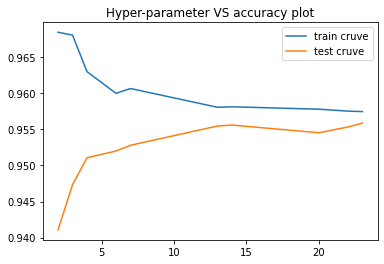

In [13]:
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [16]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

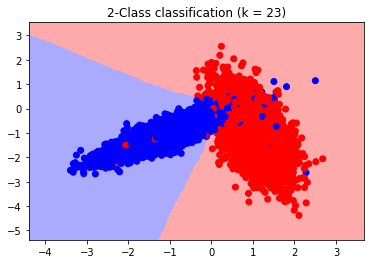

In [17]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 23)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)